## Import data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [83]:
import warnings
warnings.filterwarnings('ignore')

In [109]:
train_df=pd.read_csv('train(1).csv',index_col='PassengerId')
test_df=pd.read_csv('test(1).csv',index_col='PassengerId')

## Basic structure

In [110]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Name        891 non-null object
Sex         891 non-null object
Age         714 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Ticket      891 non-null object
Fare        891 non-null float64
Cabin       204 non-null object
Embarked    889 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [111]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 892 to 1309
Data columns (total 10 columns):
Pclass      418 non-null int64
Name        418 non-null object
Sex         418 non-null object
Age         332 non-null float64
SibSp       418 non-null int64
Parch       418 non-null int64
Ticket      418 non-null object
Fare        417 non-null float64
Cabin       91 non-null object
Embarked    418 non-null object
dtypes: float64(2), int64(3), object(5)
memory usage: 35.9+ KB


In [112]:
train_df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [113]:
test_df['Survived']=np.nan
test_df.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
PassengerId,,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,NaN
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,NaN
894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,NaN
895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,NaN
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,NaN


In [114]:
# concat train and test df
df=pd.concat((train_df,test_df))
df.sample()

,Age,Cabin,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp,Survived,Ticket
PassengerId,,,,,,,,,,,
90,24.0,NaN,S,8.05,"Celotti, Mr. Francesco",0,3,male,0,0.0,343275


## Summary Stats

In [115]:
df.describe()

,Age,Fare,Parch,Pclass,SibSp,Survived
count,1046.000000,1308.000000,1309.000000,1309.000000,1309.000000,891.000000
mean,29.881138,33.295479,0.385027,2.294882,0.498854,0.383838
std,14.413493,51.758668,0.865560,0.837836,1.041658,0.486592
min,0.170000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,21.000000,7.895800,0.000000,2.000000,0.000000,0.000000
50%,28.000000,14.454200,0.000000,3.000000,0.000000,0.000000
75%,39.000000,31.275000,0.000000,3.000000,1.000000,1.000000
max,80.000000,512.329200,9.000000,3.000000,8.000000,1.000000


In [116]:
# Fare
print('Range: ',df.Fare.max()-df.Fare.min())
print('25 percentile:',df.Fare.quantile(.25))
print('50 percentile:',df.Fare.quantile(.50))
print('75 percentile:',df.Fare.quantile(.75))
print('Variance :',df.Fare.var())
print('Standard deviation: ',df.Fare.std())

Range:  512.3292
25 percentile: 7.8958
50 percentile: 14.4542
75 percentile: 31.275
Variance : 2678.959737892894
Standard deviation:  51.75866823917414


In [117]:
# to get stats of non numeric cols
df.describe(include='all')

,Age,Cabin,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp,Survived,Ticket
count,1046.000000,295,1307,1308.000000,1309,1309.000000,1309.000000,1309,1309.000000,891.000000,1309
unique,NaN,186,3,NaN,1307,NaN,NaN,2,NaN,NaN,929
top,NaN,C23 C25 C27,S,NaN,"Connolly, Miss. Kate",NaN,NaN,male,NaN,NaN,CA. 2343
freq,NaN,6,914,NaN,2,NaN,NaN,843,NaN,NaN,11
mean,29.881138,NaN,NaN,33.295479,NaN,0.385027,2.294882,NaN,0.498854,0.383838,NaN
std,14.413493,NaN,NaN,51.758668,NaN,0.865560,0.837836,NaN,1.041658,0.486592,NaN
min,0.170000,NaN,NaN,0.000000,NaN,0.000000,1.000000,NaN,0.000000,0.000000,NaN
25%,21.000000,NaN,NaN,7.895800,NaN,0.000000,2.000000,NaN,0.000000,0.000000,NaN
50%,28.000000,NaN,NaN,14.454200,NaN,0.000000,3.000000,NaN,0.000000,0.000000,NaN
75%,39.000000,NaN,NaN,31.275000,NaN,0.000000,3.000000,NaN,1.000000,1.000000,NaN


In [118]:
# count number of male n female onboard
df.Sex.value_counts()

male      843
female    466
Name: Sex, dtype: int64

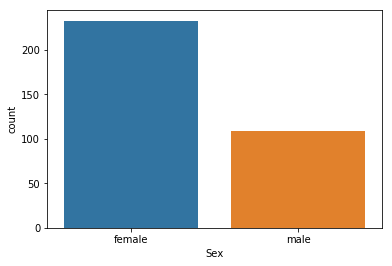

In [119]:
# plot survived male n female from train data
sns.countplot(df[df.Survived==1].Sex)

## Distributions and plots

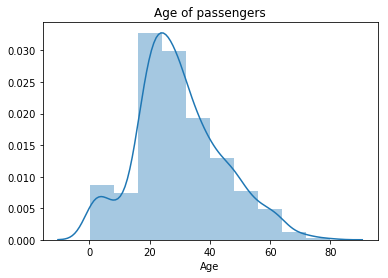

In [120]:
# histogram n kde plot for Age
sns.distplot(df.Age, bins=10, kde=True)
_=plt.title('Age of passengers')

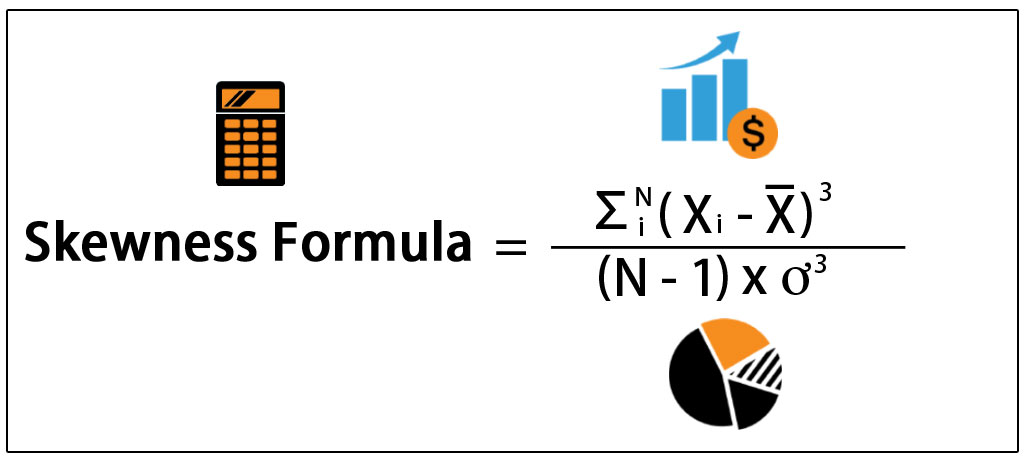

In [121]:
# skewness
print('Skewness for Age: ', df.Age.skew())

Skewness for Age:  0.40767455974362266


Skewness for Age:  4.367709134122922


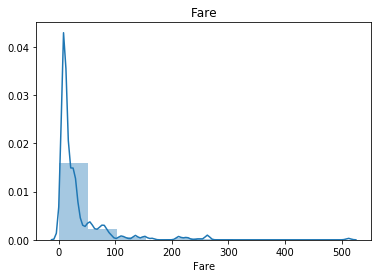

In [122]:
# histogram n kde plot for Fare
sns.distplot(df.Fare, bins=10, kde=True)
_=plt.title('Fare')
# skewness
print('Skewness for Age: ', df.Fare.skew())

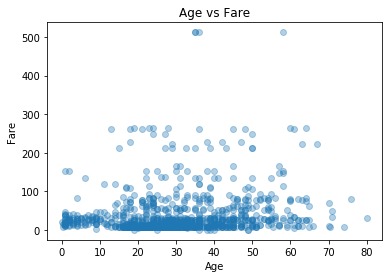

In [123]:
# scatter plot of age and fare
plt.scatter(df.Age,df.Fare,alpha=0.34)
plt.title('Age vs Fare')
plt.xlabel('Age'); _=plt.ylabel('Fare')

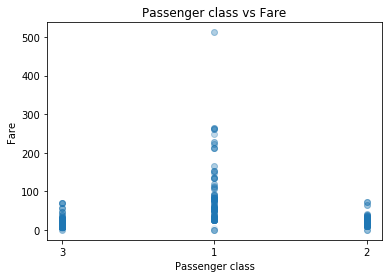

In [124]:
## scatter plot of passenger class and fare
plt.scatter(df.Pclass.astype('str'),df.Fare,alpha=0.1)
plt.title('Passenger class vs Fare')
plt.xlabel('Passenger class'); _=plt.ylabel('Fare')

## Grouping

In [125]:
df.groupby(['Sex']).Age.median()

Sex
female    27.0
male      28.0
Name: Age, dtype: float64

In [126]:
df.groupby(['Pclass'])['Fare','Age'].median()

,Fare,Age
Pclass,,
1,60.0000,39.0
2,15.0458,29.0
3,8.0500,24.0


In [127]:
df.groupby('Pclass').agg({'Fare':'median','Age':'median'})

,Fare,Age
Pclass,,
1,60.0000,39.0
2,15.0458,29.0
3,8.0500,24.0


In [128]:
df.groupby(['Pclass','Embarked']).Fare.median()

Pclass  Embarked
1       C           76.7292
        Q           90.0000
        S           52.0000
2       C           15.3146
        Q           12.3500
        S           15.3750
3       C            7.8958
        Q            7.7500
        S            8.0500
Name: Fare, dtype: float64

In [129]:
# crosstabs
pd.crosstab(df.Sex,df.Pclass)

Pclass,1,2,3
Sex,,,
female,144,106,216
male,179,171,493


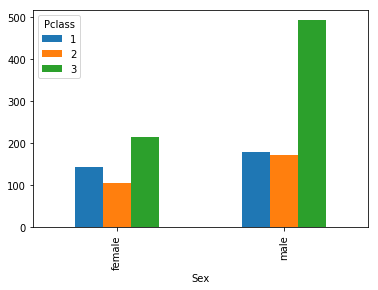

In [130]:
pd.crosstab(df.Sex,df.Pclass).plot(kind='bar')

In [131]:
# pivot tables
print('Avg. age based on Sex n Pclass')
df.pivot_table(index='Sex',columns='Pclass',values='Age',aggfunc='mean')

Avg. age based on Sex n Pclass


Pclass,1,2,3
Sex,,,
female,37.037594,27.499223,22.185329
male,41.029272,30.815380,25.962264


## Missing values

In [132]:
# count the missing values
df.isnull().sum()

Age          263
Cabin       1014
Embarked       2
Fare           1
Name           0
Parch          0
Pclass         0
Sex            0
SibSp          0
Survived     418
Ticket         0
dtype: int64

In [133]:
df.Embarked.value_counts()

S    914
C    270
Q    123
Name: Embarked, dtype: int64

In [134]:
# filling missing values in Embarked column by mode
df.Embarked.fillna('S',inplace=True)

Fare

In [135]:
df[df.Fare.isnull()]

,Age,Cabin,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp,Survived,Ticket
PassengerId,,,,,,,,,,,
1044,60.5,NaN,S,NaN,"Storey, Mr. Thomas",0,3,male,0,NaN,3701


In [136]:
# filling missing value in Fare column by median
f=df[(df.Pclass==3) & (df.Embarked=='S')].Fare.median()
df.Fare.fillna(f,inplace=True)

Age

In [137]:
df.groupby('Sex').Age.median()

Sex
female    27.0
male      28.0
Name: Age, dtype: float64

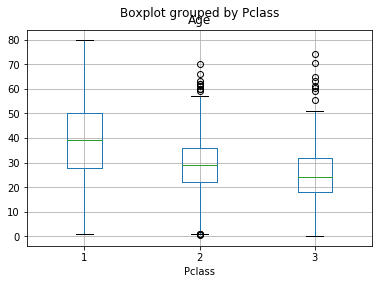

In [138]:
df[df.Age.notnull()].boxplot('Age','Pclass')

In [139]:
temp=df.groupby(['Pclass','Sex']).Age.median();temp

Pclass  Sex   
1       female    36.0
        male      42.0
2       female    28.0
        male      29.5
3       female    22.0
        male      25.0
Name: Age, dtype: float64

In [140]:
df['Age']=df.apply(lambda row: temp.loc[(row['Pclass'],row['Sex'])] if 
                  np.isnan(row['Age']) else row['Age'], axis=1)

In [141]:
df.isnull().sum()

Age            0
Cabin       1014
Embarked       0
Fare           0
Name           0
Parch          0
Pclass         0
Sex            0
SibSp          0
Survived     418
Ticket         0
dtype: int64

## Outliers

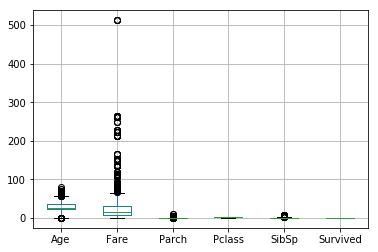

In [142]:
df.boxplot()

Fare 

In [143]:
# Binning the column as there are lot of outliers and we shouldn't impute or transform
df['Fair_new']=pd.qcut(df.Fare,4,labels={'very_low','low','high','very_high'})
#df['Fair_new'][27:30]

In [144]:
df.sample(5)

,Age,Cabin,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp,Survived,Ticket,Fair_new
PassengerId,,,,,,,,,,,,
18,29.5,NaN,S,13.0000,"Williams, Mr. Charles Eugene",0,2,male,0,1.0,244373,very_high
299,42.0,C106,S,30.5000,"Saalfeld, Mr. Adolphe",0,1,male,0,1.0,19988,high
1066,40.0,NaN,S,31.3875,"Asplund, Mr. Carl Oscar Vilhelm Gustafsson",5,3,male,1,NaN,347077,very_low
74,26.0,NaN,C,14.4542,"Chronopoulos, Mr. Apostolos",0,3,male,1,0.0,2680,very_high
551,17.0,C70,C,110.8833,"Thayer, Mr. John Borland Jr",2,1,male,0,1.0,17421,very_low


## Encoding

In [145]:
df.Age.shape

(1309,)

In [146]:
dummies=pd.get_dummies(df.Sex);dummies.sample()

,female,male
PassengerId,,
1074,1,0


In [80]:
df=pd.concat([df,dummies.drop('male',1)],1);df.sample()

,Age,Cabin,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp,Survived,Ticket,Fair_new,female
PassengerId,,,,,,,,,,,,,
465,25.0,NaN,S,8.05,"Maisner, Mr. Simon",0,3,male,0,0.0,A/S 2816,very_high,0


In [148]:
dummies2=pd.get_dummies(df.Embarked)
df=pd.concat([df,dummies2.drop('Q',1)],1);df.sample()

,Age,Cabin,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp,Survived,Ticket,Fair_new,C,S
PassengerId,,,,,,,,,,,,,,
921,25.0,NaN,C,21.6792,"Samaan, Mr. Elias",0,3,male,2,NaN,2662,high,1,0


In [149]:
# # Import label encoder 
# from sklearn import preprocessing 
  
# # label_encoder object knows how to understand word labels. 
# label_encoder = preprocessing.LabelEncoder() 
  
# # Encode labels in column 'species'. 
# df['Fair_new']= label_encoder.fit_transform(df['Fair_new'])
# df.sample()

In [151]:
label_mapping = {"very_low": 0,"low":1, "high": 2, "very_high": 2}
df = df.replace({"Fair_new": label_mapping})
df.sample()

,Age,Cabin,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp,Survived,Ticket,Fair_new,C,S
PassengerId,,,,,,,,,,,,,,
817,23.0,NaN,S,7.925,"Heininen, Miss. Wendla Maria",0,3,female,0,0.0,STON/O2. 3101290,2,0,1


In [152]:
df.dtypes

Age         float64
Cabin        object
Embarked     object
Fare        float64
Name         object
Parch         int64
Pclass        int64
Sex          object
SibSp         int64
Survived    float64
Ticket       object
Fair_new      int64
C             uint8
S             uint8
dtype: object

## choosing features

In [153]:
df=df.drop(['Cabin','Embarked','Name','Sex','Ticket','Fair_new'],1)
df.sample()

,Age,Fare,Parch,Pclass,SibSp,Survived,C,S
PassengerId,,,,,,,,
900,18.0,7.2292,0,3,0,NaN,1,0


## Model building

In [168]:
# X=df[df.Survived.notna()]
# X.Survived=X.Survived.astype('int')

# Y=df[df.Survived.isna()].drop('Survived',1)

In [186]:
X=df[df.Survived.notna()].drop('Survived',1)
y=df[df.Survived.notna()]['Survived']

In [187]:
print(X.shape,y.shape)

(891, 7) (891,)


In [188]:
# train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(712, 7) (712,)
(179, 7) (179,)


In [189]:
from sklearn.linear_model import SGDClassifier
model=SGDClassifier(max_iter=500,tol=1e-3)
model.fit(X_train,y_train)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
       early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
       l1_ratio=0.15, learning_rate='optimal', loss='hinge', max_iter=500,
       n_iter=None, n_iter_no_change=5, n_jobs=None, penalty='l2',
       power_t=0.5, random_state=None, shuffle=True, tol=0.001,
       validation_fraction=0.1, verbose=0, warm_start=False)

In [199]:
X.shape

(891, 7)

In [281]:
y_pred=model.predict(X_test)
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.7653631284916201

In [206]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression(solver='liblinear')
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
accuracy_score(y_test,y_pred)

0.7653631284916201

In [282]:
from sklearn.model_selection import GridSearchCV
model_lr = LogisticRegression()
parameters = {'C':[0.7,0.8,0.9,1.0, 10.0, 50.0, 100.0, 1000.0], 'penalty' : ['l1','l2']}
clf = GridSearchCV(model_lr, param_grid=parameters, cv=3)
clf.fit(X_train, y_train)
clf.best_params_

{'C': 0.8, 'penalty': 'l2'}

In [276]:
model=LogisticRegression(C=0.8,penalty='l2')
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
accuracy_score(y_test,y_pred)

0.7653631284916201